In [2]:
#%%
from osgeo import gdal
import rasterio
from rasterio import features
import os
from glob import glob
from rasterio.merge import merge
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# import utils
# import util_preprocess

In [3]:
target = 'class'

# Random seed
# The random seed
random_seed = 42

# Set random seed in numpy
np.random.seed(random_seed)

### Preparing contextual features 

In [4]:
User_Defined_List = ['D:/mongolia/GITHUB/features_full/fourier_sub/fourier_sc10_mean.tif',
                    'D:/mongolia/GITHUB/features_full/fourier_sub/fourier_sc20_mean.tif',
                    'D:/mongolia/GITHUB/features_full/fourier_sub/fourier_sc40_mean.tif',
                    'D:/mongolia/GITHUB/features_full/fourier_sub/fourier_sc200_mean.tif',
                    'D:/mongolia/GITHUB/features_full/gabor_sub/gabor_sc40_mean.tif',
                    'D:/mongolia/GITHUB/features_full/hog_sub/hog_sc10_max.tif',
                    'D:/mongolia/GITHUB/features_full/hog_sub/hog_sc40_variance.tif',
                    'D:/mongolia/GITHUB/features_full/mean_sub/mean_sc10_mean.tif',
                    'D:/mongolia/GITHUB/features_full/mean_sub/mean_sc20_mean.tif',
                    'D:/mongolia/GITHUB/features_full/mean_sub/mean_sc20_variance.tif',
                    'D:/mongolia/GITHUB/features_full/mean_sub/mean_sc40_variance.tif',
                    'D:/mongolia/GITHUB/features_full/lsr_sub/lsr_sc40_line_length.tif',
                    'D:/mongolia/GITHUB/features_full/lsr_sub/lsr_sc40_line_mean.tif',
                    'D:/mongolia/GITHUB/features_full/lsr_sub/lsr_sc200_line_mean.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc10_kurtosis.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc20_kurtosis.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc10_max.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc20_max.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc40_max.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc40_skew.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc20_variance.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc40_variance.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc200_max.tif',
                    'D:/mongolia/GITHUB/features_full/orb_sub/orb_sc40_variance.tif',
                    'D:/mongolia/GITHUB/features_full/orb_sub/orb_sc40_mean.tif',
                    'D:/mongolia/GITHUB/features_full/orb_sub/orb_sc10_kurtosis.tif',
                    'D:/mongolia/GITHUB/features_full/orb_sub/orb_sc200_variance.tif',]

In [5]:
# Load contextueal features 

outfile = 'D:/mongolia/GITHUB/'

# vrt_options = gdal.BuildVRTOptions(separate=True)
# vrt =  gdal.BuildVRT(f'{outfile}/spfea_27.vrt', User_Defined_List, options=vrt_options)
# vrt = None

# Load stacked data VRT 
PATH= f'{outfile}/spfea_27.vrt'

img = rasterio.open(PATH)
img_arr = img.read()
print(img_arr.shape)

# Process spfea features, get the width, height and number of bands
n = img_arr.shape[0]
print (n) # number of bands
h = img_arr.shape[1]
print (h) # height
w = img_arr.shape[2]
print (w) # width

(27, 2380, 2490)
27
2380
2490


In [126]:
bandname = []
    # loop from input 
for file in User_Defined_List:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
print(bandname)

['fourier_sc10_mean', 'fourier_sc20_mean', 'fourier_sc40_mean', 'fourier_sc200_mean', 'gabor_sc40_mean', 'hog_sc10_max', 'hog_sc40_variance', 'mean_sc10_mean', 'mean_sc20_mean', 'mean_sc20_variance', 'mean_sc40_variance', 'lsr_sc40_line_length', 'lsr_sc40_line_mean', 'lsr_sc200_line_mean', 'lbpm_sc10_kurtosis', 'lbpm_sc20_kurtosis', 'lbpm_sc10_max', 'lbpm_sc20_max', 'lbpm_sc40_max', 'lbpm_sc40_skew', 'lbpm_sc20_variance', 'lbpm_sc40_variance', 'lbpm_sc200_max', 'orb_sc40_variance', 'orb_sc40_mean', 'orb_sc10_kurtosis', 'orb_sc200_variance']


In [7]:
data_array = img_arr[:, img_arr[0,...]!=-9999]
data_array= np.transpose(data_array)
data_df = pd.DataFrame(data_array, columns=bandname)
print(data_df.shape)

(5926200, 27)


<AxesSubplot: >

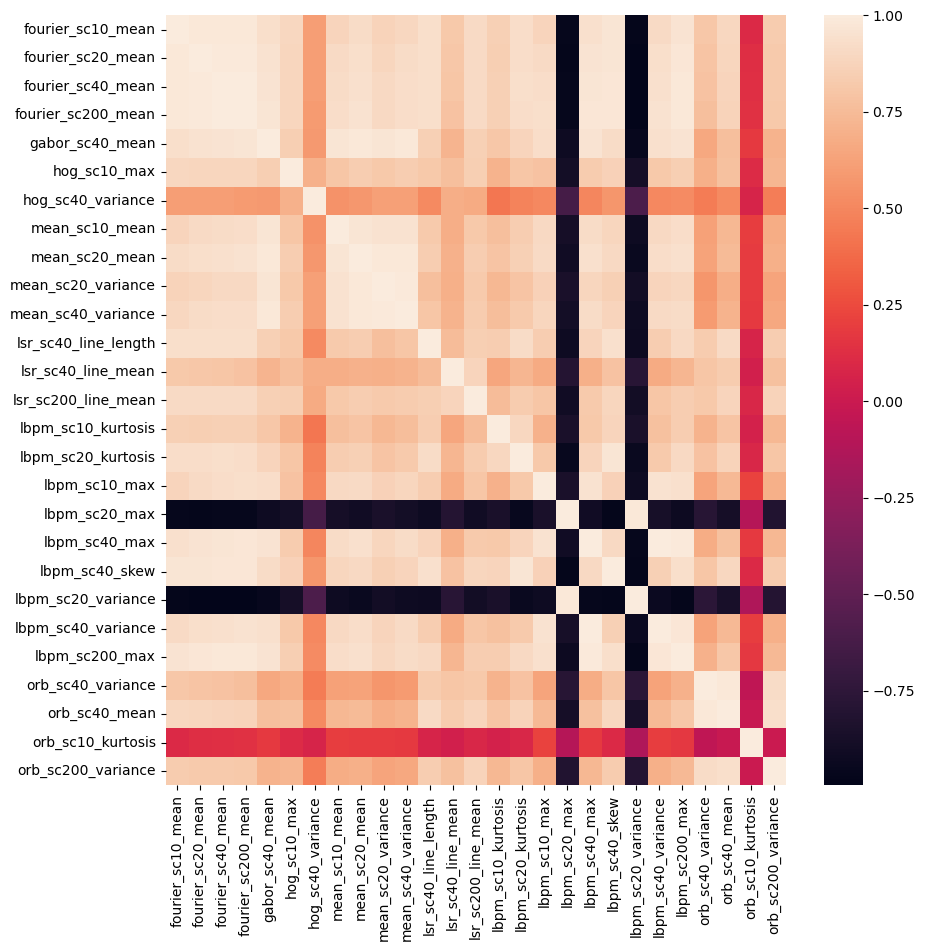

In [8]:
fig, ax = plt.subplots(figsize= (10,10),sharey=True)

sns.heatmap(data_df.corr())

In [9]:
fp = 'D:/mongolia/GITHUB/Naiman_Raster_Trainset/Naiman_Raster.tif'
train_img = rasterio.open(fp)
train_array = train_img.read()
print(train_array.shape)

(1, 2380, 2490)


In [10]:
# Cncatenate Data and Trainset
data = np.concatenate((train_array, img_arr), axis=0)
data.shape

(28, 2380, 2490)

In [11]:
names = [target] + bandname
data_arr = data.flatten()
data_arr.shape
# df_train = pd.DataFrame(data_arr, columns=names)

(165933600,)

In [12]:
data_arr = data[:, data[0,...]!=-9999]
data_arr = data[:, data[0,...]!=0]
data_arr= np.transpose(data_arr)
df_full = pd.DataFrame(data_arr, columns=names)

In [13]:
print(df_full.shape)
df_full.head(20)
df_full.columns

(26944, 28)


Index(['class', 'fourier_sc10_mean', 'fourier_sc20_mean', 'fourier_sc40_mean',
       'fourier_sc200_mean', 'gabor_sc40_mean', 'hog_sc10_max',
       'hog_sc40_variance', 'mean_sc10_mean', 'mean_sc20_mean',
       'mean_sc20_variance', 'mean_sc40_variance', 'lsr_sc40_line_length',
       'lsr_sc40_line_mean', 'lsr_sc200_line_mean', 'lbpm_sc10_kurtosis',
       'lbpm_sc20_kurtosis', 'lbpm_sc10_max', 'lbpm_sc20_max', 'lbpm_sc40_max',
       'lbpm_sc40_skew', 'lbpm_sc20_variance', 'lbpm_sc40_variance',
       'lbpm_sc200_max', 'orb_sc40_variance', 'orb_sc40_mean',
       'orb_sc10_kurtosis', 'orb_sc200_variance'],
      dtype='object')

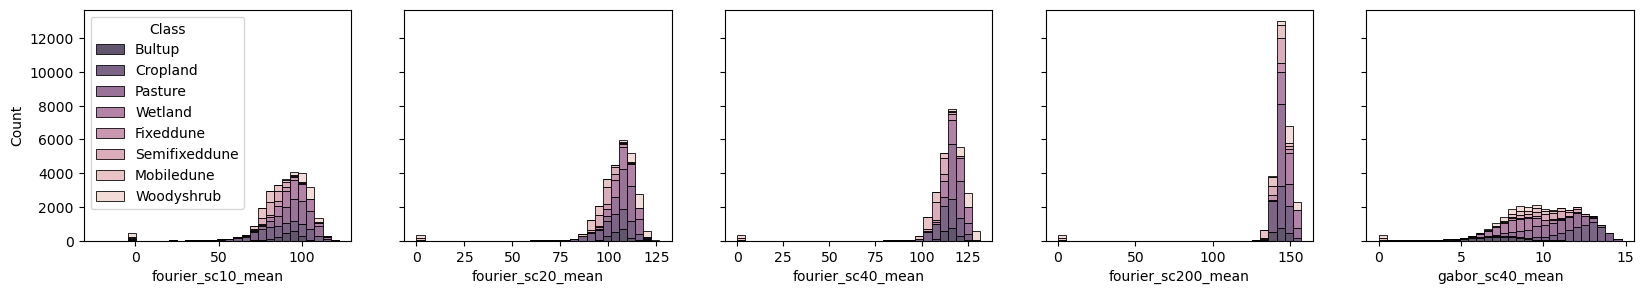

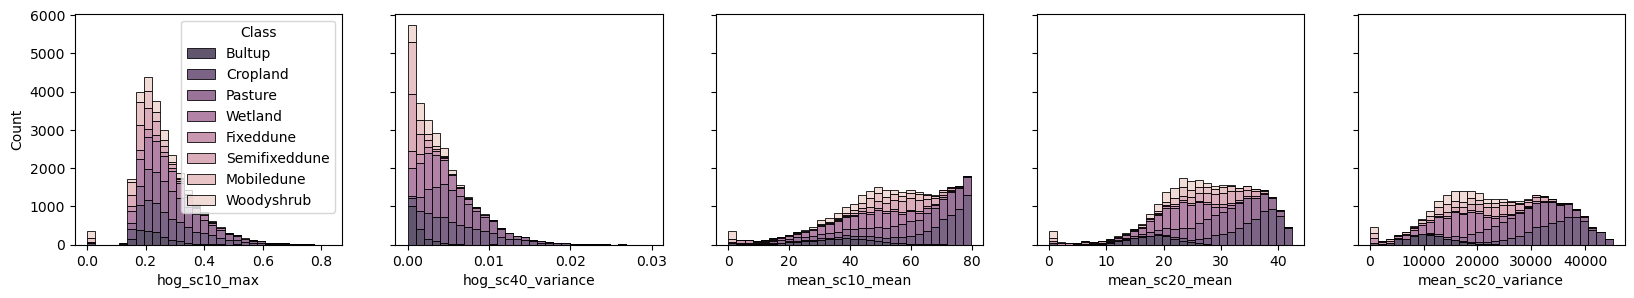

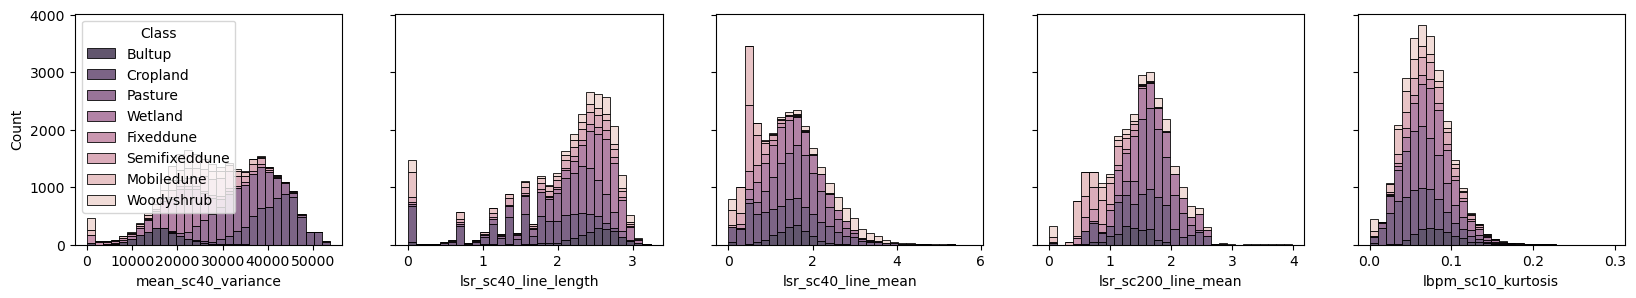

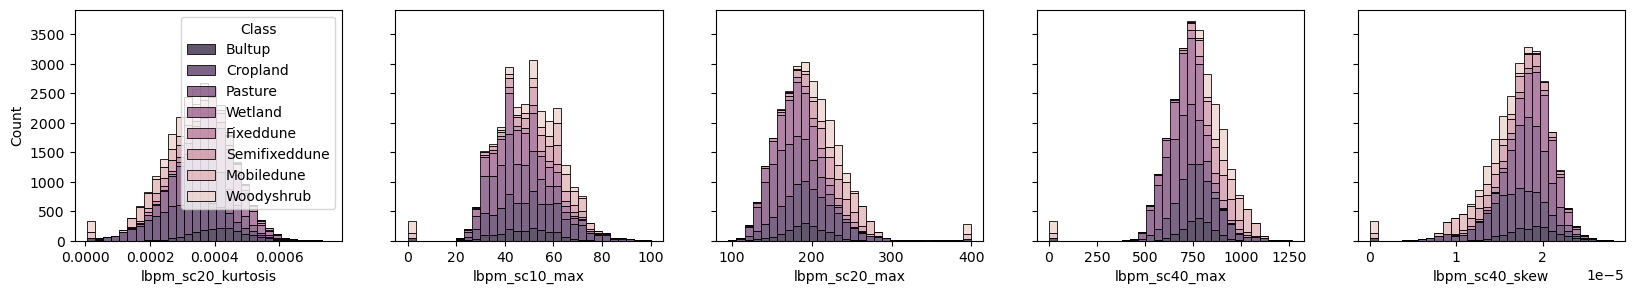

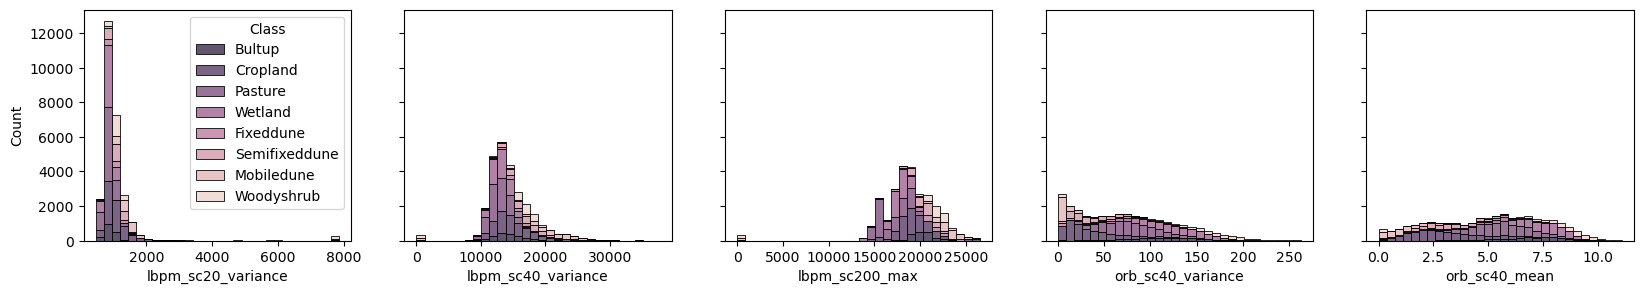

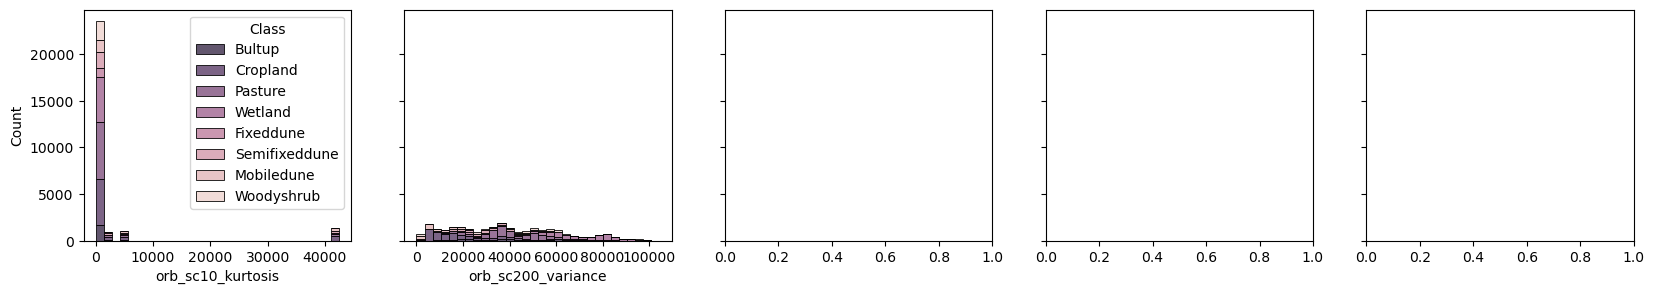

In [48]:
fig, (ax1,ax2,ax3,ax4,ax5,) = plt.subplots(ncols=5, nrows=1,figsize= (20,3),sharey=True)
sns.histplot(data=df_full, x="fourier_sc10_mean", bins=30, hue="class", legend=False, multiple="stack",ax=ax1)
sns.histplot(data=df_full, x="fourier_sc20_mean", bins=30, hue="class", legend=False, multiple="stack", ax=ax2)
sns.histplot(data=df_full, x="fourier_sc40_mean", bins=30, hue="class", legend=False, multiple="stack",ax=ax3)
sns.histplot(data=df_full, x="fourier_sc200_mean", bins=30,hue="class", legend=False, multiple="stack",ax=ax4)
sns.histplot(data=df_full, x="gabor_sc40_mean", bins=30, hue="class", legend=False, multiple="stack",ax=ax5)

ax1.legend(title='Class', loc='best', labels = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub'])
plt.show()

fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, nrows=1,figsize= (20,3),sharey=True)
sns.histplot(data=df_full, x="hog_sc10_max", bins=30, hue="class", legend=False, multiple="stack", ax=ax1)
sns.histplot(data=df_full, x="hog_sc40_variance", bins=30, hue="class", legend=False, multiple="stack",ax=ax2)
sns.histplot(data=df_full, x="mean_sc10_mean", bins=30,hue="class", legend=False, multiple="stack",ax=ax3)
sns.histplot(data=df_full, x="mean_sc20_mean", bins=30, hue="class", legend=False, multiple="stack",ax=ax4)
sns.histplot(data=df_full, x="mean_sc20_variance", bins=30, hue="class", legend=False, multiple="stack", ax=ax5)

ax1.legend(title='Class', loc='best', labels = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub'])
plt.show()


fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, nrows=1,figsize= (20,3),sharey=True)
sns.histplot(data=df_full, x="mean_sc40_variance", bins=30, hue="class", legend=False, multiple="stack",ax=ax1)
sns.histplot(data=df_full, x="lsr_sc40_line_length", bins=30,hue="class", legend=False, multiple="stack",ax=ax2)
sns.histplot(data=df_full, x="lsr_sc40_line_mean", bins=30, hue="class", legend=False, multiple="stack",ax=ax3)
sns.histplot(data=df_full, x="lsr_sc200_line_mean", bins=30, hue="class", legend=False, multiple="stack", ax=ax4)
sns.histplot(data=df_full, x="lbpm_sc10_kurtosis", bins=30, hue="class", legend=False, multiple="stack",ax=ax5)

ax1.legend(title='Class', loc='best', labels = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub'])
plt.show()


fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, nrows=1,figsize= (20,3),sharey=True)
sns.histplot(data=df_full, x="lbpm_sc20_kurtosis", bins=30,hue="class", multiple="stack",ax=ax1)
sns.histplot(data=df_full, x="lbpm_sc10_max", bins=30, hue="class", legend=False, multiple="stack",ax=ax2)
sns.histplot(data=df_full, x="lbpm_sc20_max", bins=30, hue="class", legend=False, multiple="stack", ax=ax3)
sns.histplot(data=df_full, x="lbpm_sc40_max", bins=30, hue="class", legend=False, multiple="stack",ax=ax4)
sns.histplot(data=df_full, x="lbpm_sc40_skew", bins=30,hue="class", legend=False, multiple="stack",ax=ax5)

ax1.legend(title='Class', loc='best', labels = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub'])
plt.show()


fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, nrows=1,figsize= (20,3),sharey=True)
sns.histplot(data=df_full, x="lbpm_sc20_variance", bins=30, hue="class", legend=False, multiple="stack",ax=ax1)
sns.histplot(data=df_full, x="lbpm_sc40_variance", bins=30, hue="class", legend=False, multiple="stack", ax=ax2)
sns.histplot(data=df_full, x="lbpm_sc200_max", bins=30, hue="class", legend=False, multiple="stack",ax=ax3)
sns.histplot(data=df_full, x="orb_sc40_variance", bins=30,hue="class", legend=False, multiple="stack",ax=ax4)
sns.histplot(data=df_full, x="orb_sc40_mean", bins=30, hue="class", legend=False, multiple="stack",ax=ax5)

ax1.legend(title='Class', loc='best', labels = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub'])
plt.show()


fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(ncols=5, nrows=1,figsize= (20,3),sharey=True)
sns.histplot(data=df_full, x="orb_sc10_kurtosis", bins=30, hue="class", legend=False, multiple="stack", ax=ax1)
sns.histplot(data=df_full, x="orb_sc200_variance", bins=30, hue="class", legend=False, multiple="stack",ax=ax2)

ax1.legend(title='Class', loc='best', labels = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


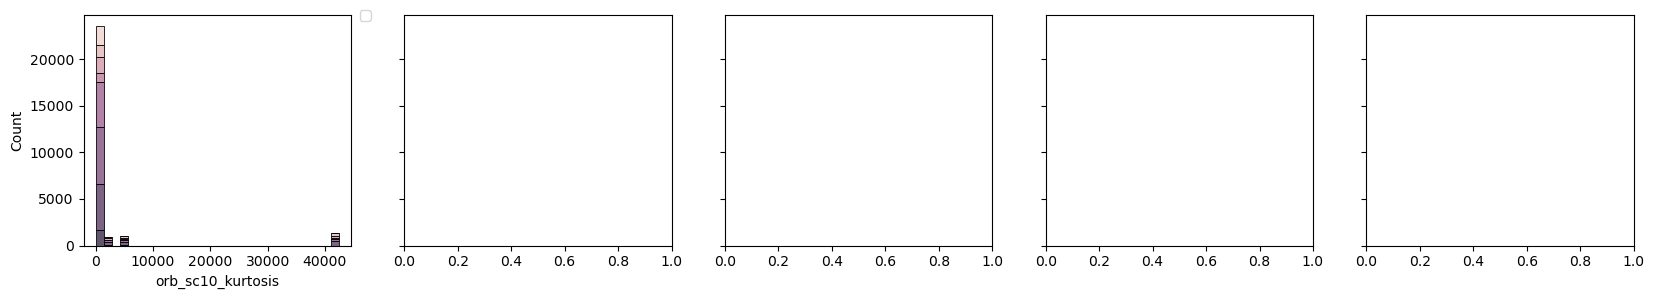

In [46]:

fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(ncols=5, nrows=1,figsize= (20,3),sharey=True)
sns.histplot(data=df_full, x="orb_sc10_kurtosis", bins=30, hue="class", legend=False, multiple="stack", ax=ax1)
# sns.histplot(data=df_full, x="orb_sc200_variance", bins=30, hue="class", multiple="stack",ax=ax2)


ax1.legend(title='Class', loc='best', labels = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub'])
ax1.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()
# # title
# new_title = 'My title'
# # g._legend.set_title(new_title)
# leg = g.axes.flat[0].get_legend()
# new_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)
# # plt.legend(title='Contextual Features ', loc='upper left', labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
# # plt.show()

In [11]:
# tr_name = ["class"]
# tr_img_data = train_array.flatten()
# df_train = pd.DataFrame(tr_img_data, columns=tr_name)
# df_train.head()
# df_train['class'].unique()

array([0, 1, 3, 2, 7, 8, 6, 5, 4], dtype=uint8)

In [14]:
# # concat trainset and data
# data_concat = pd.concat([df_train, data_df], axis=1)
# print (data_concat.shape)
# data_concat = data_concat.dropna(axis=0)

(5926200, 28)


In [15]:
# df_full = data_concat.loc[data_concat['class'] != 0 ]
# print(df_full.shape)
# df_full['class']=df_full['class'].astype(int)
# df_full['class'].unique()

(26886, 28)


C:\Users\mowus\AppData\Local\Temp\ipykernel_11252\2764323844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['class']=df_full['class'].astype(int)


array([1, 3, 2, 7, 8, 6, 5, 4])

In [77]:
df_full.head(40)

def reclass(row):
    reclass = row['class']
    if reclass == 1: return 0
    if reclass == 2: return 1
    if reclass == 3: return 2
    if reclass == 4: return 3
    if reclass == 5: return 4
    if reclass == 6: return 5
    if reclass == 7: return 6
    if reclass == 8: return 7
    return reclass
df_full['class'] = df_full.apply(reclass, axis=1)

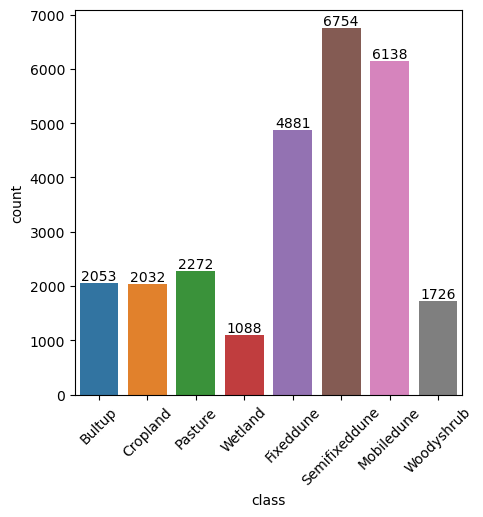

In [63]:
# Plot training clsss frequency

df_class = df_full.groupby(by='class',).agg({'class': 'sum'})
df_class.head()
fig, ax = plt.subplots(figsize= (5,5),sharey=True)
sns.countplot(data=df_class, x=df_full['class'],ax=ax)
labels = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub']
ax.set_xticklabels(labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for i in ax.containers:
    ax.bar_label(i,)


## Prepare for modelling

In [116]:
# Divide the training data into training (80%) and testing (20%)
df_train, df_test = train_test_split(df_full, train_size=0.80, random_state=random_seed, shuffle=True, stratify=df_full['class'])
# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.90, random_state=random_seed,)
# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

print('df_train', df_train.shape)
print('df_val', df_val.shape)
print('df_test', df_test.shape)

df_train (19399, 28)
df_val (2156, 28)
df_test (5389, 28)


In [117]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [118]:
# Imputer 
from sklearn.impute import SimpleImputer

si =SimpleImputer(missing_values=0, strategy='mean')

# Standardize the training data
X_train = si.fit_transform(X_train)

# Standardize the validation data
X_val = si.transform(X_val)

# Standardize the test data
X_test = si.transform(X_test)

# The StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

In [112]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_val = le.fit_transform(y_val)

In [119]:
# import XGBClassifier
from xgboost import XGBClassifier

params = {'objective': 'multi:softmax',
          'n_estimators': 100,
        #   'scale_pos_weight': 2,
          'early_stopping_rounds': 10,
          'eval_metric':'mlogloss',
        #   'min_child_weight':5,
        #   'subsample': 0.5,
        #   'colsample_bytree':0.5,
          'max_depth' : 5,
          'gamma':0.05
         }

model = XGBClassifier(**params, validate_parameters=True, random_state=random_seed)
model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-mlogloss:1.29571	validation_1-mlogloss:1.30934
[1]	validation_0-mlogloss:0.98402	validation_1-mlogloss:1.00641
[2]	validation_0-mlogloss:0.78253	validation_1-mlogloss:0.81175
[3]	validation_0-mlogloss:0.63963	validation_1-mlogloss:0.67427
[4]	validation_0-mlogloss:0.53352	validation_1-mlogloss:0.57358
[5]	validation_0-mlogloss:0.45552	validation_1-mlogloss:0.49842
[6]	validation_0-mlogloss:0.39378	validation_1-mlogloss:0.43843
[7]	validation_0-mlogloss:0.34616	validation_1-mlogloss:0.39348
[8]	validation_0-mlogloss:0.30893	validation_1-mlogloss:0.35664
[9]	validation_0-mlogloss:0.27750	validation_1-mlogloss:0.32727
[10]	validation_0-mlogloss:0.24990	validation_1-mlogloss:0.30172
[11]	validation_0-mlogloss:0.22986	validation_1-mlogloss:0.28281
[12]	validation_0-mlogloss:0.21224	validation_1-mlogloss:0.26633
[13]	validation_0-mlogloss:0.19581	validation_1-mlogloss:0.25064
[14]	validation_0-mlogloss:0.18402	validation_1-mlogloss:0.24018
[15]	validation_0-mlogloss:0.17321	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.05, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

F1: [0.9971836652584992]
Recall: [0.9957814383286461]
Precision: [0.9985898468976632]


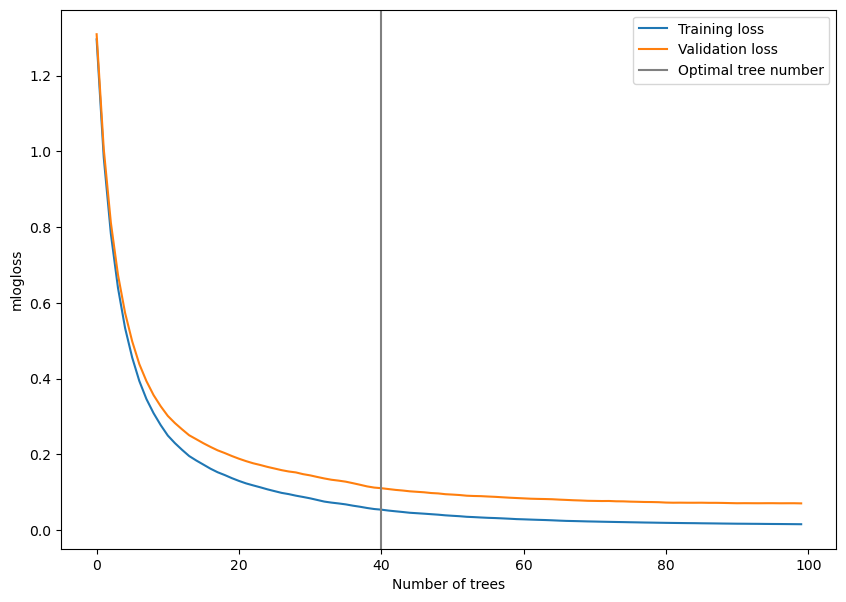

In [120]:
from catboost.utils import eval_metric
# import CatBoost

# predictions = model.predict(X_test, output_margin=True)
predictions = model.predict(X_test, output_margin=False)
# best_iteration = model.get_booster().best_ntree_limit
# predict(X_test, ntree_limit=best_iteration)

F1 = eval_metric(y_test, predictions, 'F1')
Precision = eval_metric(y_test, predictions, 'Precision')
Recall = eval_metric(y_test, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)

from matplotlib import pyplot as plt
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation loss")
plt.axvline(40, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("mlogloss")
plt.legend()

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


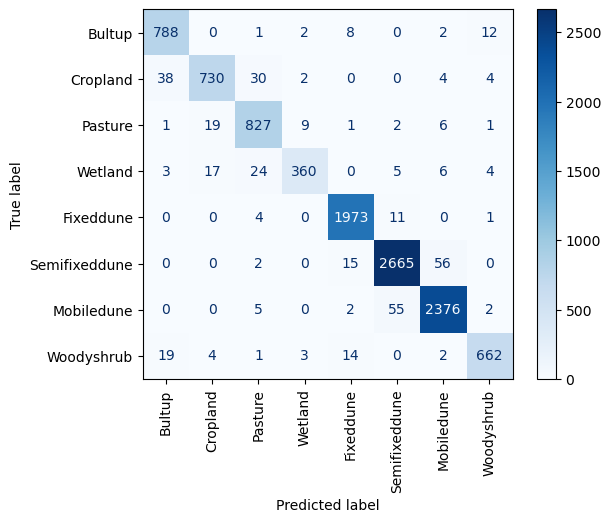

In [77]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
class_names = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub']
disp = plot_confusion_matrix(model, X_test, y_test, display_labels =class_names, cmap=plt.cm.Blues,xticks_rotation='vertical')

In [121]:
from sklearn.metrics import classification_report, confusion_matrix


print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))

=== Confusion Matrix ===
[[ 404    1    2    0    0    0    1    3]
 [  12  372   18    2    0    0    0    2]
 [   0    4  443    4    2    0    1    0]
 [   0    0    2  213    1    0    1    1]
 [   0    0    1    0  969    5    0    1]
 [   0    0    0    0    4 1339    8    0]
 [   0    0    0    0    0   18 1210    0]
 [   9    2    2    1    2    0    0  329]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       411
           1       0.98      0.92      0.95       406
           2       0.95      0.98      0.96       454
           3       0.97      0.98      0.97       218
           4       0.99      0.99      0.99       976
           5       0.98      0.99      0.99      1351
           6       0.99      0.99      0.99      1228
           7       0.98      0.95      0.97       345

    accuracy                           0.98      5389
   macro avg       0.97      0.97      0.97      5389
we

In [ ]:
# Save the model

## Explanable AI using SHAP

In [122]:
import shap 
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [123]:
df_test.head()

,class,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,...,lbpm_sc20_max,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance
0,4,82.359970,101.688705,111.596291,140.948608,10.429718,0.162796,0.003767,61.057751,27.720188,...,170.095444,723.0,0.000020,778.322083,12847.493164,17244.0,69.313255,5.500000,31.100277,42700.058594
1,4,88.685593,101.786392,113.485420,140.883804,10.016860,0.328206,0.003963,47.893978,29.248755,...,170.524216,734.0,0.000020,783.306580,13051.789062,16859.0,64.953514,5.285714,36.872742,47678.445312
2,4,90.231354,104.600044,117.465401,148.519104,7.739587,0.262254,0.000969,43.009449,21.449476,...,196.356628,805.0,0.000017,924.358398,14816.412109,18232.0,102.189758,6.750000,515.088623,80789.812500
3,6,63.737061,108.925758,111.416458,137.584412,13.534490,0.214897,0.017238,77.563148,33.551891,...,185.832626,814.0,0.000016,1006.892883,15689.100586,19518.0,6.018927,1.071429,0.000000,5069.346191
4,4,104.494843,111.261765,122.303909,150.113144,9.956902,0.203237,0.003481,54.242966,29.662704,...,196.264221,714.0,0.000019,951.034729,13288.182617,17191.0,126.617821,7.642857,44.861721,74708.828125


In [124]:
df_shap = df_test.drop('class', axis=1)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_shap)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


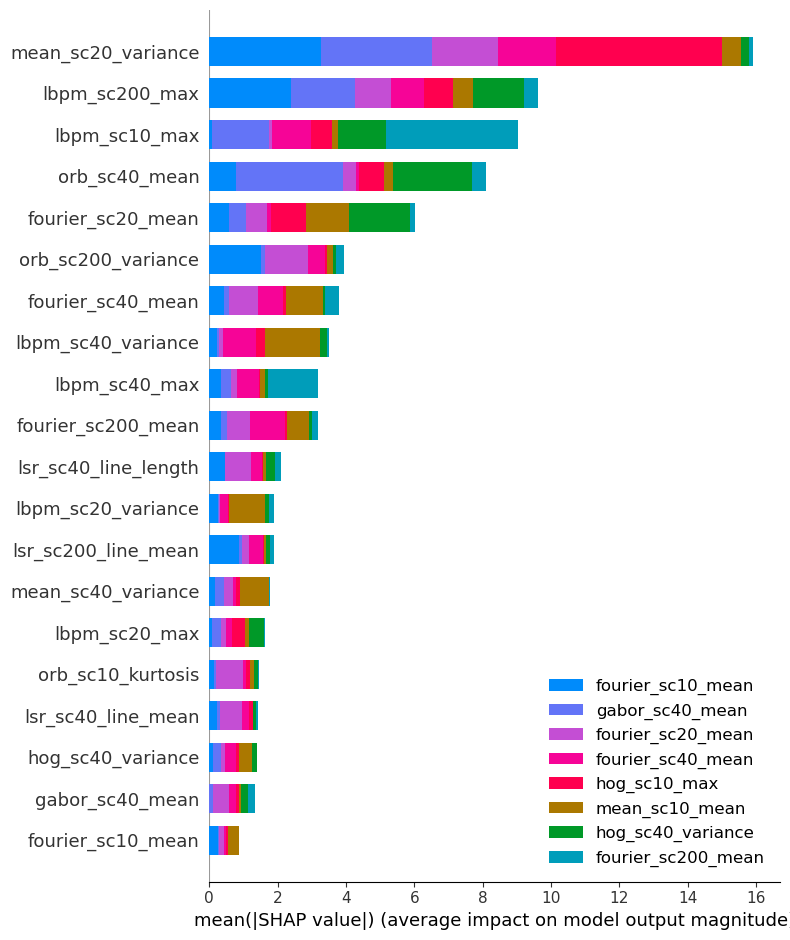

In [127]:
class_names = bandname
shap.summary_plot(shap_values, df_shap, plot_type="bar", class_names=class_names,  feature_names=df_shap.columns,  )

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


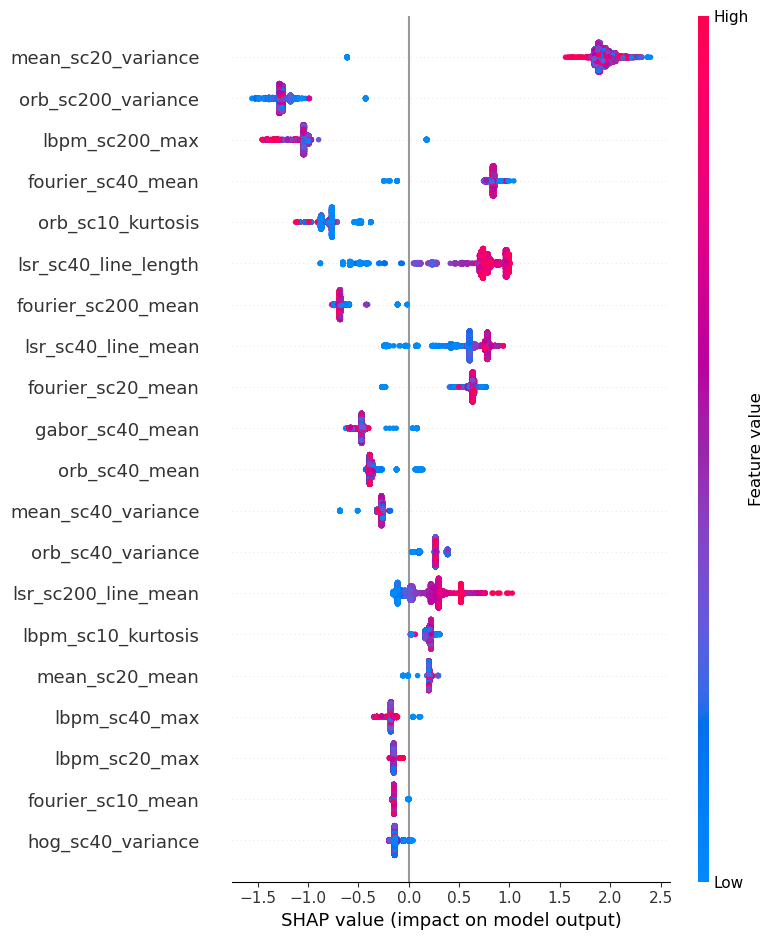

In [128]:
shap.summary_plot(shap_values[1], df_shap.values, feature_names=df_shap.columns)

In [97]:
# Shap Force Plot
i=8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], df_shap.values[i], feature_names=df_shap.columns)

In [132]:
# from xgboost import plot_importance
# from matplotlib import pyplot

# # plot feature importance
# plot_importance(model)
# pyplot.show()

Text(0.5, 1.0, 'Feature Importance')

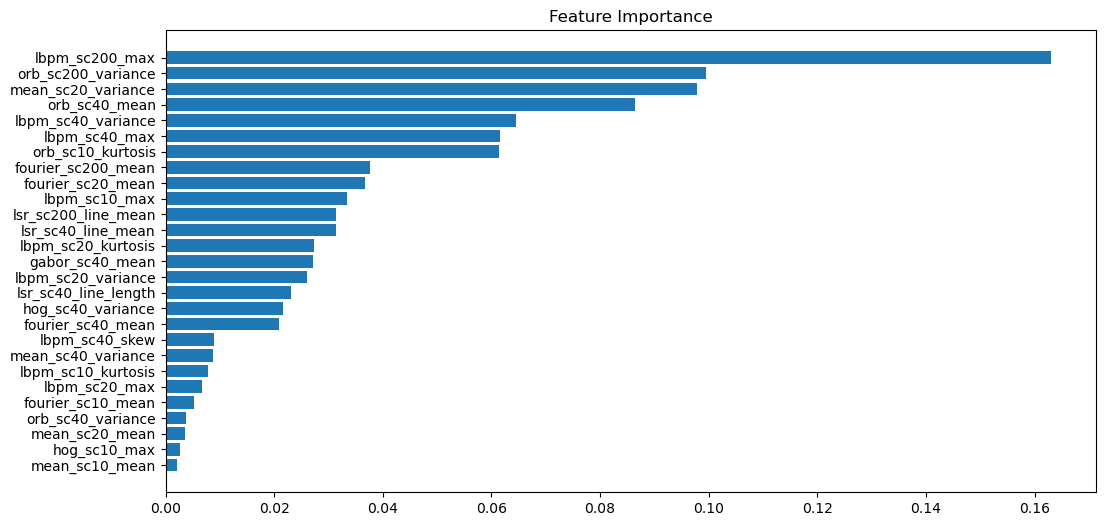

In [131]:

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(bandname)[sorted_idx])
plt.title('Feature Importance')


## Inference 

In [133]:
# Make dataframe

data_df['uid'] = np.arange(start=0,stop = len(data_df), dtype=int)
print(data_df.shape)
data_df.head()

(5926200, 28)


,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,mean_sc20_variance,...,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance,uid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7855.0625,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7855.0625,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7855.0625,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7855.0625,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7855.0625,0.0,0.0,0.0,0.0,0.0,0.0,4


In [134]:
# Handling missing data

## Check and count for NaN values by column in the table
if data_df.isnull().any().any():
    for colomn in list(data_df.columns.values):
        if data_df[colomn].isnull().any():
            print ("Column '"+str(colomn)+"' have "+str(data_df[colomn].isnull().sum())+" NULL values")
else: print ("No missing values in dataframe") 
        
## Check and count for Inf values by column in the table
if np.isinf(data_df).any().any():
    for colomn in list(data_df.columns.values):
        if np.isinf(data_df[colomn]).any():
            print ("Column '"+str(colomn)+"' have "+str(np.isinf(data_df[colomn]).sum())+" Infinite values")
else: print ("No infinite values in dataframe") 

No missing values in dataframe
No infinite values in dataframe


In [135]:
data_df['orb_sc40_mean'] = data_df['orb_sc40_mean'].fillna(value=0)
data_X = data_df.loc[ data_df['orb_sc40_mean'] != 0 ]
data_uid = data_X
data_x  = data_X.drop(columns=['uid'])

data_uid['catid'] = np.arange(start=0,stop = len(data_uid), dtype=int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
from sklearn.impute import SimpleImputer
# The SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
data_x_tran = si.fit_transform(data_x)

# # Standardize Testing data
data_x_scale = ss.fit_transform(data_x_tran)



In [138]:
# PREDICTION 
pred_map = model.predict(data_x_scale)

In [139]:
# Convert narray to dataframe
col_name = ['pred']
predictions_image = pd.DataFrame(pred_map, columns=col_name)
predictions_image['catid'] = np.arange(start=0,stop = len(predictions_image), dtype=int) # add a uniques id to merge
print(predictions_image.shape)
predictions_image.head()

(3720110, 2)


,pred,catid
0,6,0
1,5,1
2,6,2
3,6,3
4,6,4


In [140]:
# merge prediction to data_x (data with useful info)
map_data = predictions_image.merge(data_uid, how='inner', on='catid')
# map_data = pd.concat([predictions_image, data_x], axis=1 )
print (map_data.shape)
#
# set index for merging with big image data
map_data  = map_data.set_index('uid')
df1  = data_df.set_index('uid')

(3720110, 30)


In [141]:
# merge to bg image data
predictions_image_merge = pd.merge(df1, map_data, how='outer', right_index=True, left_index=True)

predictions_image = predictions_image_merge['pred'].values

print(predictions_image.shape)

(5926200,)


In [142]:
(unique, counts) = np.unique(predictions_image, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[0.000000e+00, 2.830220e+05],
       [1.000000e+00, 1.195130e+05],
       [2.000000e+00, 2.840370e+05],
       [3.000000e+00, 3.381960e+05],
       [4.000000e+00, 9.484370e+05],
       [5.000000e+00, 5.357670e+05],
       [6.000000e+00, 1.015363e+06],
       [7.000000e+00, 1.957750e+05],
       [         nan, 2.206090e+06]])

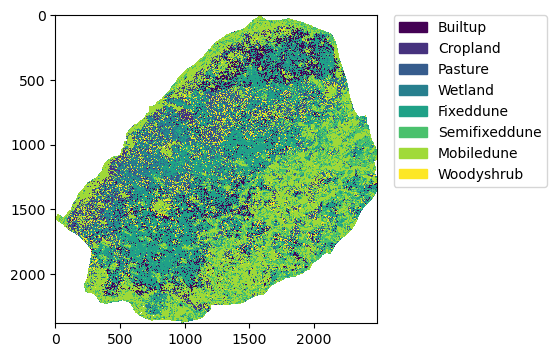

In [148]:
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

pred_map = predictions_image.reshape(h, w)


values = np.unique(pred_map.ravel())

plt.figure(figsize=(8,4))
im = plt.imshow(pred_map, interpolation='none')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Class {l}".format(l=values[i]) ) for i in range(len(values)) ]

labels = ['Builtup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub']
ax.set_xticklabels(labels)
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=labels )

plt.show()

## Save map

In [144]:
# Creating the directory for the cv results produced by GridSearchCV
# Make directory
directory = os.path.dirname('D:/mongolia/mongolia_ml_model/output/mgl_map')
if not os.path.exists(directory):
    os.makedirs(directory)

In [145]:
import datetime

T = datetime.datetime.now()
time = T.strftime("%y%m%d%H%M%S")

filename = 'mgl_subset'
out_file = f"{directory}/{filename}_{time}.tif"
# out_file = "/home/ubuntu/max/output/lag_lgb_map.tif"
# update profile from red band
fp = f'D:/mongolia/mongolia_ml_model/features/fourier/fourier_sc10_mean.tif'
with rasterio.open(fp, mode="r") as src:
    out_profile = src.profile.copy()
    out_profile.update(count=1,
                       nodata=-9999,
                       dtype='float32',
                       width=src.width,
                       height=src.height,
                       crs=src.crs)

# open in 'write' mode, unpack profile info to dst
with rasterio.open(out_file,
                   'w', **out_profile) as dst:
    dst.write_band(1, pred_map)